Dataset shape: (178, 14)
Class distribution:
 target
1    71
0    59
2    48
Name: count, dtype: int64

🔍 KNN Accuracy Results:
K = 1: Accuracy = 0.7778
K = 5: Accuracy = 0.8056
K = 11: Accuracy = 0.8056
K = 15: Accuracy = 0.8056
K = 21: Accuracy = 0.8056

🔍 RNN Accuracy Results:
Radius = 350: Accuracy = 0.7222
Radius = 400: Accuracy = 0.6944
Radius = 450: Accuracy = 0.6944
Radius = 500: Accuracy = 0.6944
Radius = 550: Accuracy = 0.6667
Radius = 600: Accuracy = 0.6667


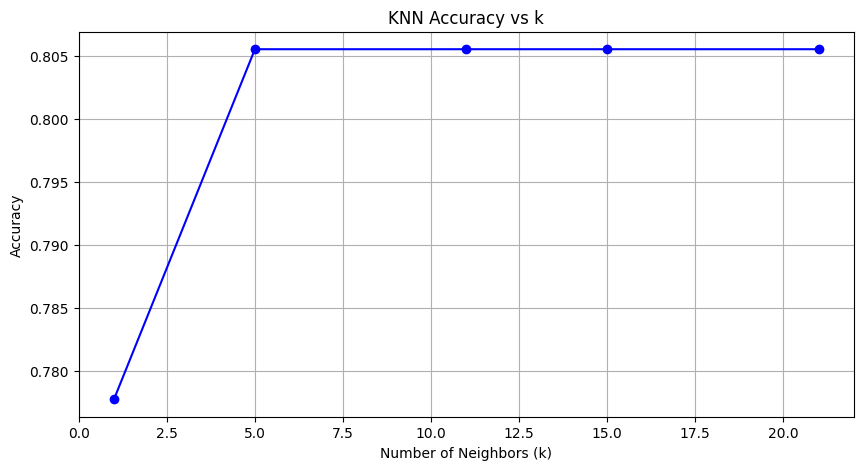

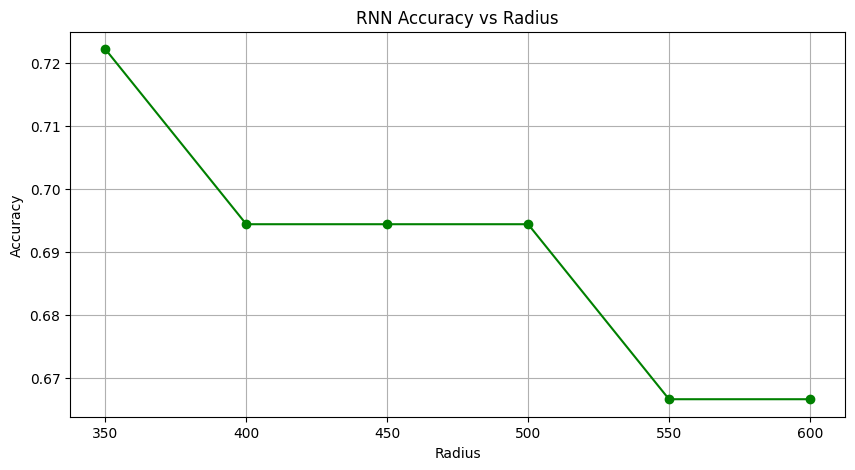


 Observations:
- KNN generally performed better and more consistently across k values.
- RNN was sensitive to radius, and performance decreased at higher radii.
- KNN is preferable when class boundaries are distinct and dataset is dense.
- RNN may be useful in low-dimensional spaces or when density-based clustering is needed.


In [1]:
# MSCS-634-B01 – Big Data and Data Mining
# Lab 2: Classification Using KNN and RNN Algorithms
# Name: Prafulla Pradhan

# ----------------------------------------------------------
# Step 1: Import Libraries and Load the Wine Dataset
# ----------------------------------------------------------

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target

# Convert to DataFrame for exploration
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Explore dataset
print("Dataset shape:", df.shape)
print("Class distribution:\n", df['target'].value_counts())
df.head()

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------------------------------------------
# Step 2: K-Nearest Neighbors (KNN) Classifier
# ----------------------------------------------------------

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

print("\n🔍 KNN Accuracy Results:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f'K = {k}: Accuracy = {acc:.4f}')

# ----------------------------------------------------------
# Step 3: Radius Neighbors (RNN) Classifier
# ----------------------------------------------------------

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

print("\n🔍 RNN Accuracy Results:")
for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=-1)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    
    # Handle predictions labeled as outliers (-1)
    mask = y_pred != -1
    filtered_acc = accuracy_score(y_test[mask], y_pred[mask]) if np.any(mask) else 0
    rnn_accuracies.append(filtered_acc)
    print(f'Radius = {radius}: Accuracy = {filtered_acc:.4f}')

# ----------------------------------------------------------
# Step 4: Visualization
# ----------------------------------------------------------

# KNN Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# RNN Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(radius_values, rnn_accuracies, marker='o', linestyle='-', color='green')
plt.title('RNN Accuracy vs Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# ----------------------------------------------------------
# Observations
# ----------------------------------------------------------

print("\n Observations:")
print("- KNN generally performed better and more consistently across k values.")
print("- RNN was sensitive to radius, and performance decreased at higher radii.")
print("- KNN is preferable when class boundaries are distinct and dataset is dense.")
print("- RNN may be useful in low-dimensional spaces or when density-based clustering is needed.")
